## (B-b) vs (B-V)

Minimum errors in B_b_err: 0.0040551338594578
Minimum errors in B_V_err: 0.004
Beta: [ 0.14990428 27.01015587]
Beta Std Error: [0.06947947 0.12399453]
Beta Covariance: [[ 1.97300597e-05 -3.30710080e-05]
 [-3.30710080e-05  6.28377301e-05]]
Residual Variance: 244.67218377157607
Inverse Condition #: 0.009029940421961452
Reason(s) for Halting:
  Sum of squares convergence


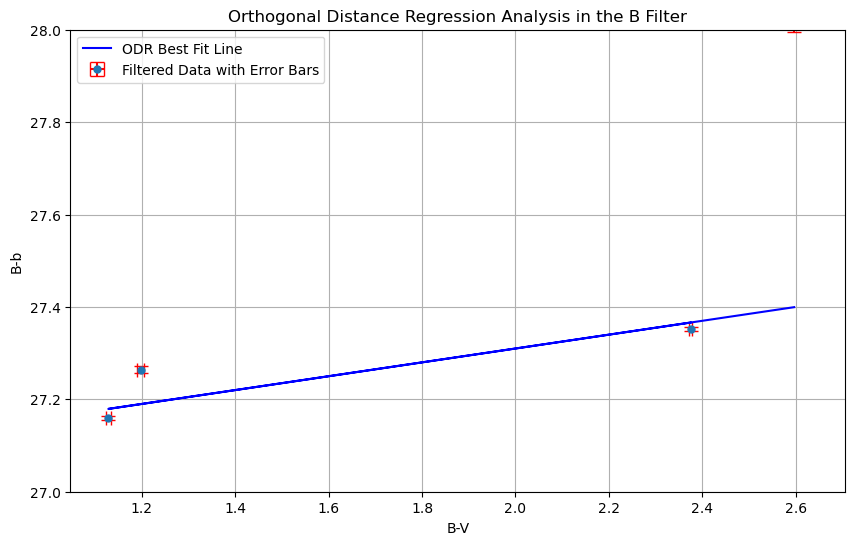

In [22]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_b = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 1.869 Airmass/BResult_1.86957829916.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 1.869 Airmass/VResult_1.84592332402.csv").dropna()

# Merge B and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_b, df_v, on=['RA', 'DEC'], suffixes=('_b', '_v'))

# Calculate B-b and B-V
merged_data['B_b'] = merged_data['Known_B'] - merged_data['Instrumental_B']
merged_data['B_V'] = merged_data['Known_B'] - merged_data['Known_V']


# Filter data
threshold_bv = 0.8
threshold_bb = 26.0
filtered_data = merged_data[(merged_data['B_V'] > threshold_bv) & (merged_data['B_b'] > threshold_bb)].copy()

# Error propagation
filtered_data['B_b_err'] = filtered_data['KnownB_err'] + filtered_data['InstrumentalB_err']
filtered_data['B_V_err'] = filtered_data['KnownB_err'] + filtered_data['KnownV_err']

# Check if any error terms are too small
print("Minimum errors in B_b_err:", filtered_data['B_b_err'].min())
print("Minimum errors in B_V_err:", filtered_data['B_V_err'].min())

# Preparing ODR
x = filtered_data['B_V']
y = filtered_data['B_b']
x_err = filtered_data['B_V_err']
y_err = filtered_data['B_b_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('B-V')
plt.ylabel('B-b')
plt.title('Orthogonal Distance Regression Analysis in the B Filter')
plt.ylim(27, 28)  # Setting the y-axis to range from 25 to 28
plt.legend()
plt.grid(True)
plt.show()



## (V–v) vs (B–V)

Minimum errors in V_v_err: 0.0015134660625337
Minimum errors in B_V_err: 0.004
Beta: [ 0.31282005 27.62650785]
Beta Std Error: [0.34232728 0.70974332]
Beta Covariance: [[ 8.81471033e-06 -1.76656963e-05]
 [-1.76656963e-05  3.78902650e-05]]
Residual Variance: 13294.591062691332
Inverse Condition #: 0.007245257377227616
Reason(s) for Halting:
  Sum of squares convergence


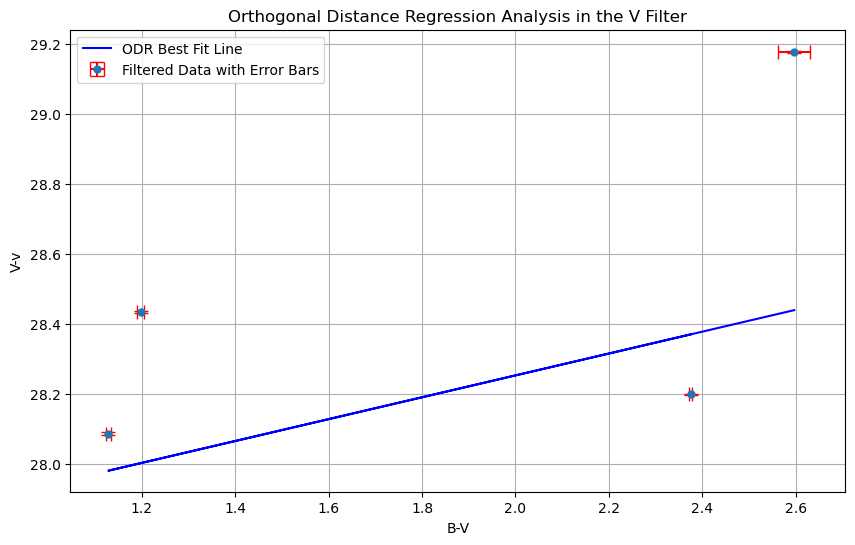

In [21]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_b = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 1.869 Airmass/BResult_1.86957829916.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 1.869 Airmass/VResult_1.84592332402.csv").dropna()

# Merge B and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_b, df_v, on=['RA', 'DEC'], suffixes=('_b', '_v'))

# Calculate V-v and B-V
merged_data['V_v'] = merged_data['Known_V'] - merged_data['Instrumental_V']
merged_data['B_V'] = merged_data['Known_B'] - merged_data['Known_V']

# Filter data
threshold_bv = 0.0  # Adjust threshold for B-V if needed
threshold_vv = 0.0  # Threshold for V-v values, adjust as needed
filtered_data = merged_data[(merged_data['B_V'] > threshold_bv) & (merged_data['V_v'] > threshold_vv)].copy()

# Error propagation
filtered_data['V_v_err'] = filtered_data['KnownV_err'] + filtered_data['InstrumentalV_err']
filtered_data['B_V_err'] = filtered_data['KnownB_err'] + filtered_data['KnownV_err']

# Check if any error terms are too small
print("Minimum errors in V_v_err:", filtered_data['V_v_err'].min())
print("Minimum errors in B_V_err:", filtered_data['B_V_err'].min())

# Preparing ODR
x = filtered_data['B_V']
y = filtered_data['V_v']
x_err = filtered_data['B_V_err']
y_err = filtered_data['V_v_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('B-V')
plt.ylabel('V-v')
plt.title('Orthogonal Distance Regression Analysis in the V Filter')
plt.legend()
plt.grid(True)
plt.show()


## (R–r) vs (V–R)

Minimum errors in R_r_err: 0.0016546167098091
Minimum errors in V_R_err: 0.002
Beta: [-1.27147796 27.82319193]
Beta Std Error: [0.3368081  0.43972672]
Beta Covariance: [[ 0.00012274 -0.00015759]
 [-0.00015759  0.00020921]]
Residual Variance: 924.2549671358183
Inverse Condition #: 0.009176987258617987
Reason(s) for Halting:
  Sum of squares convergence


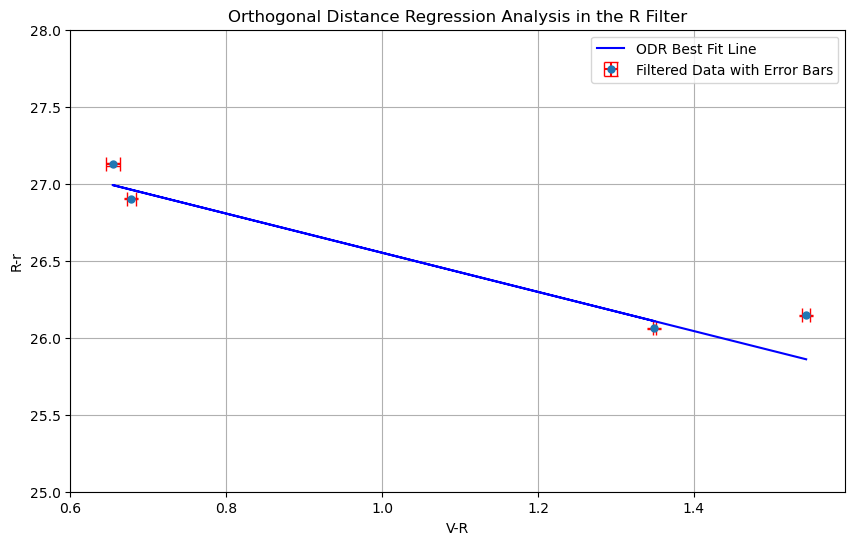

In [11]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_r = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 1.869 Airmass/RResult_1.86208945872.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 1.869 Airmass/VResult_1.84592332402.csv").dropna()


# Merge R and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_r, df_v, on=['RA', 'DEC'], suffixes=('_r', '_v'))

# Calculate R-r and V-R
merged_data['R_r'] = merged_data['Known_R'] - merged_data['Instrumental_R']
merged_data['V_R'] = merged_data['Known_V'] - merged_data['Known_R']

# Filter data
threshold_vr = 0.0 # Adjust threshold for V-R if needed
threshold_rr = 0.0  # Threshold for R-r values, adjust as needed
filtered_data = merged_data[(merged_data['V_R'] > threshold_vr) & (merged_data['R_r'] > threshold_rr)].copy()

# Error propagation
filtered_data['R_r_err'] = filtered_data['KnownR_err'] + filtered_data['InstrumentalR_err']
filtered_data['V_R_err'] = filtered_data['KnownV_err'] + filtered_data['KnownR_err']

# Check if any error terms are too small
print("Minimum errors in R_r_err:", filtered_data['R_r_err'].min())
print("Minimum errors in V_R_err:", filtered_data['V_R_err'].min())

# Preparing ODR
x = filtered_data['V_R']
y = filtered_data['R_r']
x_err = filtered_data['V_R_err']
y_err = filtered_data['R_r_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('V-R')
plt.ylabel('R-r')
plt.title('Orthogonal Distance Regression Analysis in the R Filter')
plt.ylim(25, 28)  # Setting the y-axis to range from 25 to 28
plt.legend()
plt.grid(True)
plt.show()


## (I–i) vs (V–I)

Minimum errors in I_i_err: 0.0015954961880784001
Minimum errors in V_i_err: 0.002
Beta: [-2.59758432 32.21011129]
Beta Std Error: [ 4.05919664 10.37248805]
Beta Covariance: [[ 0.00107701 -0.0027474 ]
 [-0.0027474   0.00703243]]
Residual Variance: 15298.899193933945
Inverse Condition #: 0.0018057200929136247
Reason(s) for Halting:
  Sum of squares convergence


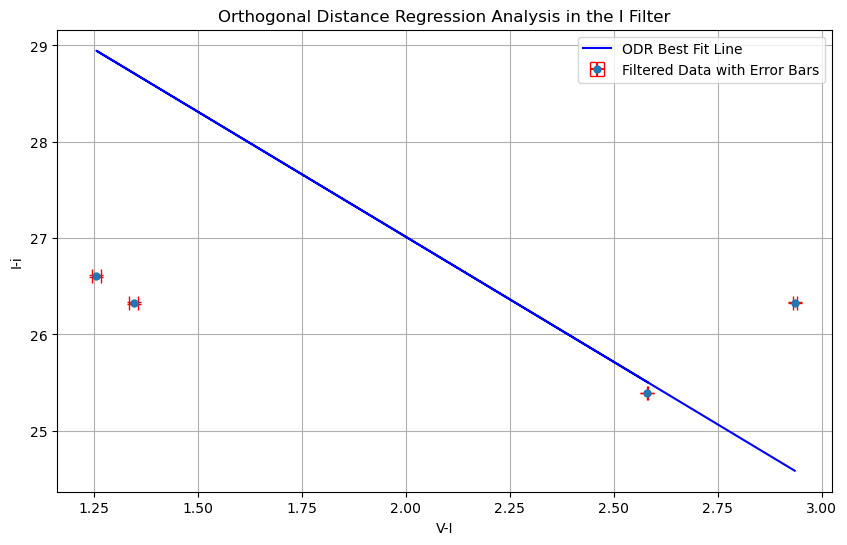

In [9]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_i = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 1.869 Airmass/IResult_1.88574519777.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/Filters 1.869 Airmass/VResult_1.84592332402.csv").dropna()

# Merge I and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_i, df_v, on=['RA', 'DEC'], suffixes=('_i', '_v'))

# Calculate I-i and V-i
merged_data['I_i'] = merged_data['Known_I'] - merged_data['Instrumental_I']
merged_data['V_i'] = merged_data['Known_V'] - merged_data['Known_I']

# Filter data
threshold_vi = 0.5  # Adjust threshold for V-i if needed
threshold_ii = 25.0  # Threshold for I-i values, adjust as needed
filtered_data = merged_data[(merged_data['V_i'] > threshold_vi) & (merged_data['I_i'] > threshold_ii)].copy()

# Error propagation
filtered_data['I_i_err'] = filtered_data['KnownI_err'] + filtered_data['InstrumentalI_err']
filtered_data['V_i_err'] = filtered_data['KnownV_err'] + filtered_data['KnownI_err']

# Check if any error terms are too small
print("Minimum errors in I_i_err:", filtered_data['I_i_err'].min())
print("Minimum errors in V_i_err:", filtered_data['V_i_err'].min())

# Preparing ODR
x = filtered_data['V_i']
y = filtered_data['I_i']
x_err = filtered_data['V_i_err']
y_err = filtered_data['I_i_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('V-I')
plt.ylabel('I-i')
plt.title('Orthogonal Distance Regression Analysis in the I Filter')
plt.legend()
plt.grid(True)
plt.show()
